In [1]:
#from pandas_profiling import ProfileReport
import pandas as pd
import seaborn as sns
import numpy as np
#import os
#import matplotlib.pyplot as plt

In [2]:
tree_data = pd.read_csv("TreeCoverLoss_2001-2020_ByRegion.csv")

In [3]:
tree_data.head()

,CountryCode,Year,TreeCoverLoss_ha,GrossEmissions_Co2_all_gases_Mg
0,AFG,2001,88.092712,2.226891e+04
1,AGO,2001,101220.621500,3.687662e+07
2,AIA,2001,3.878461,6.267003e+02
3,ALA,2001,396.934826,7.589787e+04
4,ALB,2001,3729.021031,1.333223e+06


In [4]:
tree_data.shape

(3967, 4)

In [5]:
tree_data.tail()

,CountryCode,Year,TreeCoverLoss_ha,GrossEmissions_Co2_all_gases_Mg
3962,XKO,2020,970.789805,5.576097e+05
3963,XNC,2020,6.185126,1.797582e+03
3964,ZAF,2020,62247.300630,4.492736e+07
3965,ZMB,2020,163028.437800,5.971516e+07
3966,ZWE,2020,6224.919002,2.842921e+06


In [9]:
tree_data.CountryCode.unique()

array(['AFG', 'AGO', 'AIA', 'ALA', 'ALB', 'AND', 'ARG', 'ARM', 'ATG',
       'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BES', 'BFA', 'BGD',
       'BGR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB',
       'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV',
       'CMR', 'COD', 'COG', 'COL', 'COM', 'CPV', 'CRI', 'CUB', 'CUW',
       'CYM', 'CYP', 'CZE', 'DEU', 'DMA', 'DNK', 'DOM', 'DZA', 'ECU',
       'EGY', 'ERI', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA', 'GAB',
       'GBR', 'GEO', 'GGY', 'GHA', 'GIB', 'GIN', 'GLP', 'GMB', 'GNB',
       'GNQ', 'GRC', 'GRD', 'GTM', 'GUF', 'GUY', 'HKG', 'HND', 'HRV',
       'HTI', 'HUN', 'IDN', 'IMN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISR',
       'ITA', 'JAM', 'JEY', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM',
       'KNA', 'KOR', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LIE', 'LKA',
       'LSO', 'LTU', 'LUX', 'LVA', 'MAC', 'MAF', 'MAR', 'MDA', 'MDG',
       'MDV', 'MEX', 'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MNG', 'MOZ',
       'MRT', 'MSR',

In [8]:
tree_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3967 entries, 0 to 3966
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   CountryCode                      3967 non-null   object 
 1   Year                             3967 non-null   int64  
 2   TreeCoverLoss_ha                 3967 non-null   float64
 3   GrossEmissions_Co2_all_gases_Mg  3967 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 124.1+ KB


In [10]:
# goal get top 5 countries that have lost most total tree cover. 
tree_data.head()


,CountryCode,Year,TreeCoverLoss_ha,GrossEmissions_Co2_all_gases_Mg
0,AFG,2001,88.092712,2.226891e+04
1,AGO,2001,101220.621500,3.687662e+07
2,AIA,2001,3.878461,6.267003e+02
3,ALA,2001,396.934826,7.589787e+04
4,ALB,2001,3729.021031,1.333223e+06


In [40]:
total_cover_country = tree_data.groupby("CountryCode", as_index = False)[["TreeCoverLoss_ha"]].sum()
total_cover_country.head()

,CountryCode,TreeCoverLoss_ha
0,ABW,2.555406e+00
1,AFG,1.854775e+03
2,AGO,3.113739e+06
3,AIA,4.646683e+01
4,ALA,1.308958e+04


In [36]:
total_cover_country.sort_values("TreeCoverLoss_ha", ascending=False).head()

,CountryCode,TreeCoverLoss_ha
161,RUS,6.948921e+07
28,BRA,5.982569e+07
34,CAN,4.408659e+07
199,USA,4.223512e+07
87,IDN,2.772100e+07


In [37]:
top_5 = total_cover_country.sort_values("TreeCoverLoss_ha", ascending=False)[0:5]
top_5.head()

,CountryCode,TreeCoverLoss_ha
161,RUS,6.948921e+07
28,BRA,5.982569e+07
34,CAN,4.408659e+07
199,USA,4.223512e+07
87,IDN,2.772100e+07


In [42]:
top_5["loss_mil_ha"] = top_5.TreeCoverLoss_ha/1000000
top_5.head()

,CountryCode,TreeCoverLoss_ha,loss_mil_ha
161,RUS,6.948921e+07,69.489208
28,BRA,5.982569e+07,59.825691
34,CAN,4.408659e+07,44.086591
199,USA,4.223512e+07,42.235117
87,IDN,2.772100e+07,27.720995


<AxesSubplot:xlabel='CountryCode', ylabel='loss_mil_ha'>

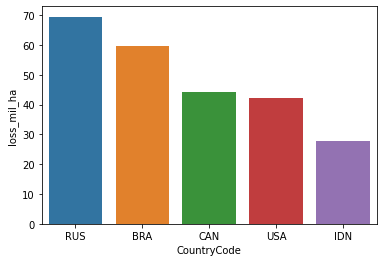

In [43]:
sns.barplot(x = "CountryCode", y="loss_mil_ha", data = top_5 )

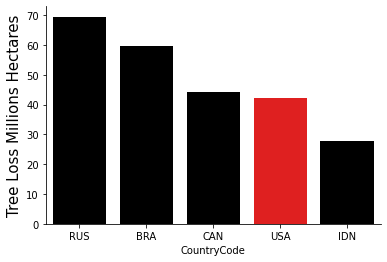

In [47]:
my_colors = sns.color_palette(["black", "black", "black", "red", "black"])
bootiful = sns.barplot(x = "CountryCode", y="loss_mil_ha", data = top_5, palette = my_colors)
bootiful.set_ylabel("Tree Loss Millions Hectares", fontsize = 15)
sns.despine()

